# Tratamento de dados utilizando uma API pública de StarWars

## 1. Importando bibliotecas que serão utilizadas

In [28]:
import requests
import pandas as pd


## 2. Criando uma função para coletar os dados da API pública

In [29]:
"""
    Função para buscar dados da API SWAPI em um determinado endpoint.
"""
def fetch_data_from_swapi(endpoint):
    base_url = 'https://swapi.dev/api/'
    results = []
    url = base_url + endpoint
    
    while url:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            results.extend(data['results'])
            url = data['next']  # próxima página de resultados
        else:
            print(f"Erro ao acessar a API: {response.status_code}")
            break
    
    return results


## 3. Coleta de dados sobre os planetas

In [30]:
# Buscando dados sobre os planetas
planets_data = fetch_data_from_swapi('planets/')

# Criando um DataFrame
planets_df = pd.DataFrame(planets_data)

# Ajustar a exibição para mostrar números inteiros em vez de notação científica
pd.set_option('display.float_format', '{:,.0f}'.format)

# Exibindo as primeiras linhas do DataFrame para verificação
planets_df.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


## 4. Limpeza e conversão dos dados

In [31]:
# Convertendo colunas numéricas para o tipo apropriado
planets_df['population'] = pd.to_numeric(planets_df['population'], errors='coerce')
planets_df['diameter'] = pd.to_numeric(planets_df['diameter'], errors='coerce')
planets_df['rotation_period'] = pd.to_numeric(planets_df['rotation_period'], errors='coerce')
planets_df['orbital_period'] = pd.to_numeric(planets_df['orbital_period'], errors='coerce')
planets_df['surface_water'] = pd.to_numeric(planets_df['surface_water'], errors='coerce')

# Exibindo as primeiras linhas após a conversão
planets_df.head()


,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,"10,465",arid,1 standard,desert,1,"200,000","[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,"12,500",temperate,1 standard,"grasslands, mountains",40,"2,000,000,000","[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,"4,818","10,200","temperate, tropical",1 standard,"jungle, rainforests",8,"1,000",[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,"7,200",frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,NaN,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,"8,900",murky,N/A,"swamp, jungles",8,NaN,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


In [32]:
"""
    Remove as linhas que contêm valores NaN do DataFrame.

    Parâmetros:
    - dataframe (pd.DataFrame): O DataFrame do qual as linhas com NaN serão removidas.
    - columns (list, opcional): Lista de colunas para verificar NaNs. Se None, verifica todas as colunas.

    Retorna:
    - pd.DataFrame: Um DataFrame sem as linhas que contêm valores NaN nas colunas especificadas.
"""

def remove_nan_rows(dataframe, columns=None):
    if columns:
        cleaned_df = dataframe.dropna(subset=columns)
    else:
        cleaned_df = dataframe.dropna()
    
    return cleaned_df

# Removendo linhas com NaN em todas as colunas
planets_df_cleaned = remove_nan_rows(planets_df)

# Removendo linhas com NaN apenas nas colunas 'population' e 'diameter'
planets_df_cleaned = remove_nan_rows(planets_df, columns=['population', 'diameter'])

planets_df_cleaned.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,"10,465",arid,1 standard,desert,1,"200,000","[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,"12,500",temperate,1 standard,"grasslands, mountains",40,"2,000,000,000","[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,"4,818","10,200","temperate, tropical",1 standard,"jungle, rainforests",8,"1,000",[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
5,Bespin,12,"5,110","118,000",temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,"6,000,000",[https://swapi.dev/api/people/26/],[https://swapi.dev/api/films/2/],2014-12-10T11:43:55.240000Z,2014-12-20T20:58:18.427000Z,https://swapi.dev/api/planets/6/
6,Endor,18,402,"4,900",temperate,0.85 standard,"forests, mountains, lakes",8,"30,000,000",[https://swapi.dev/api/people/30/],[https://swapi.dev/api/films/3/],2014-12-10T11:50:29.349000Z,2014-12-20T20:58:18.429000Z,https://swapi.dev/api/planets/7/


## 5. Análise de insights

### 5.1 Estatísticas descritivas

In [33]:
# Estatísticas Descritivas
planets_df_cleaned.describe()


,rotation_period,orbital_period,diameter,surface_water,population
count,39,39,39,22,39
mean,27,627,"13,220",33,"30,947,472,628"
std,12,"1,052","17,859",37,"160,127,850,159"
min,12,167,0,0,0
25%,23,305,"9,465",5,"9,250,000"
50%,25,368,"11,370",11,"421,000,000"
75%,27,407,"13,495",60,"3,500,000,000"
max,87,"5,110","118,000",100,"1,000,000,000,000"


### 5.2 Planetas com maior e menor população

In [39]:
# Planeta com maior e menor população
most_populated_planet = planets_df_cleaned.loc[planets_df_cleaned['population'].idxmax()]['name']
least_populated_planet = planets_df_cleaned.loc[planets_df_cleaned['population'].idxmin()]['name']
print(f"Planeta com maior população: {most_populated_planet}")
print(f"Planeta com menor população: {least_populated_planet}")

# Selecionando os 10 planetas mais populosos para exibição
top_planets_df = planets_df_cleaned[['name', 'diameter', 'population']].sort_values(by='population', ascending=False).head(10)



Planeta com maior população: Coruscant
Planeta com menor população: Tund


### 5.3 Análise de correlação

In [35]:
# Analisando a correlação entre o diâmetro do planeta e sua população
correlation = planets_df_cleaned[['diameter', 'population']].corr()
correlation


,diameter,population
diameter,1,-0
population,-0,1


## 6. Visualização do diâmetro vs. população

### 6.1 Importando a biblioteca `matplotlib` e construindo um gráfico para visualização do diâmetro dos planetas comparados com a sua população

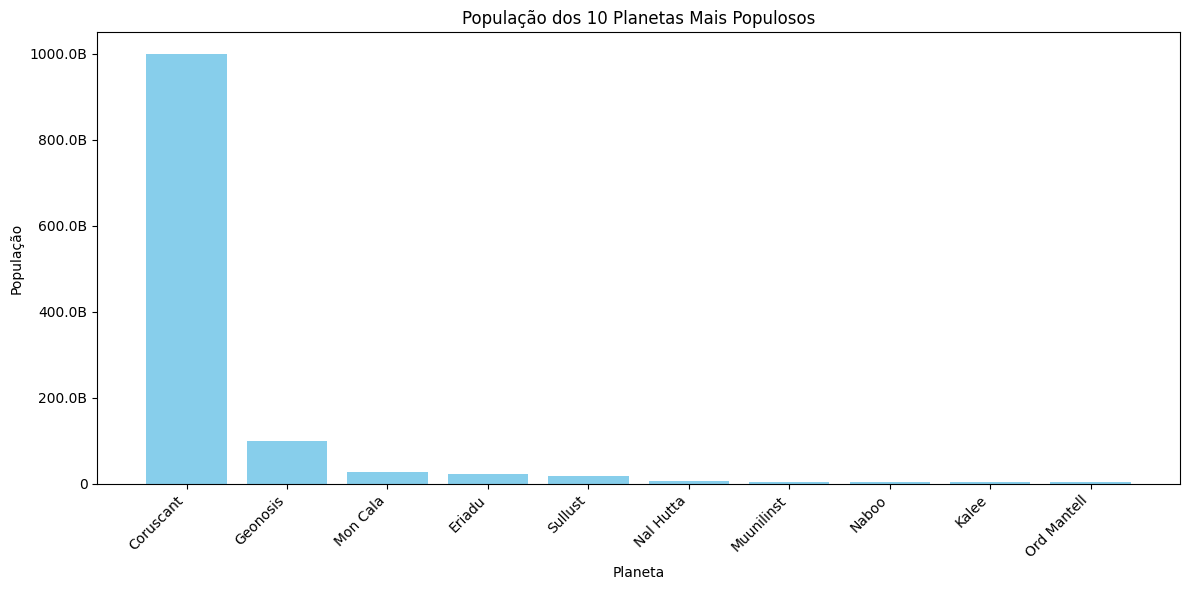

In [40]:
import matplotlib.pyplot as plt

# Função para formatar os valores com K, M, B
def format_value(value, tick_number):
    if value >= 1_000_000_000:
        return f'{value / 1_000_000_000:.1f}B'  # Bilhão
    elif value >= 1_000_000:
        return f'{value / 1_000_000:.1f}M'     # Milhão
    elif value >= 1_000:
        return f'{value / 1_000:.1f}K'         # Mil
    else:
        return int(value)                      # Valor inteiro sem formatação

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_planets_df['name'], top_planets_df['population'], color='skyblue')
plt.title('População dos 10 Planetas Mais Populosos')
plt.xlabel('Planeta')
plt.ylabel('População')
plt.xticks(rotation=45, ha='right')

# Ajustando a escala do eixo y para usar a função de formatação
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_value))

plt.tight_layout()
plt.show()
